In [24]:
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Определение функции для аппроксимации
def target_function(x):
    return 1 / (1 + 25 * x**2)

# Создание обучающей выборки
def create_training_data(l):
    x_train = np.linspace(-2, 2, l)
    y_train = target_function(x_train)
    return x_train, y_train

# Создание контрольной выборки
def create_validation_data(l):
    x_val = np.linspace(-2, 2, l - 1)
    y_val = target_function(x_val)
    return x_val, y_val

# Параметры для выборок
l_train = 50  # Размер обучающей выборки
l_val = 50    # Размер контрольной выборки

x_train, y_train = create_training_data(l_train)
x_val, y_val = create_validation_data(l_val)

# Определение типа задачи (минимизация ошибки)
creator.create("FitnessMin", base.Fitness, weights=(-0.1,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Создание инструментов для работы с генетическим алгоритмом
toolbox = base.Toolbox()

# Генерация случайного полинома степени 20 с коэффициентами от -3 до 3
toolbox.register("attr_float", np.random.uniform, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=21)

# Создание популяции и установка операторов для генетического алгоритма
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", lambda ind: (np.mean((np.polyval(ind, x_train) - y_train)**2),))  # Оценочная функция

# Визуализация процесса обучения
def plot_progress(logbook):
    gen = logbook.select("gen")
    fit_mins = logbook.select("min")
    plt.figure()
    plt.plot(gen, fit_mins, "-b", label="Min Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="best")
    plt.title("Fitness over Generations")
    plt.show()

toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Оператор скрещивания
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)  # Оператор мутации
toolbox.register("select", tools.selTournament, tournsize=3)  # Оператор выбора

# Генетический алгоритм
population = toolbox.population(n=300)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)

HALL_OF_FAME_SIZE = 10
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)


logbook = tools.Logbook()
logbook.header = ["gen", "min"]
genetic_algorithm_result, logbook = algorithms.eaMuPlusLambda(population, toolbox, mu=50, lambda_=100, cxpb=0.7,
                                                              mutpb=0.2, ngen=100, stats=stats, halloffame=hof, 
                                                              verbose=True)

# Найденный полином с наилучшей оценкой
best_individual = tools.selBest(population, k=1)[0]
print("Best Individual (Polynomial Coefficients):", best_individual)

gen	nevals	min        
0  	300   	6.65107e+07
1  	90    	1.27167e+08
2  	86    	1.27167e+08
3  	95    	1.27167e+08
4  	89    	1.18275e+08
5  	90    	2.66476e+07
6  	83    	2.66476e+07
7  	89    	4.8237e+06 
8  	87    	4.8237e+06 
9  	85    	4.8237e+06 
10 	90    	4.8237e+06 
11 	90    	4.8237e+06 
12 	89    	718750     
13 	90    	718750     
14 	91    	718750     
15 	93    	717786     
16 	94    	717089     
17 	89    	717001     
18 	91    	708734     
19 	95    	708174     
20 	93    	705585     
21 	91    	702031     
22 	90    	695201     
23 	93    	688410     
24 	91    	675448     
25 	93    	668384     
26 	93    	663022     
27 	93    	657918     
28 	87    	658716     
29 	86    	658166     
30 	88    	655830     
31 	95    	654808     
32 	88    	653711     
33 	89    	650396     
34 	87    	650396     
35 	87    	650168     
36 	90    	648651     
37 	86    	647225     
38 	92    	642417     
39 	90    	640197     
40 	89    	641400     
41 	85    	638620     
42 	92    	

C:\Users\AlexB\AppData\Local\Temp\ipykernel_14584\635021118.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


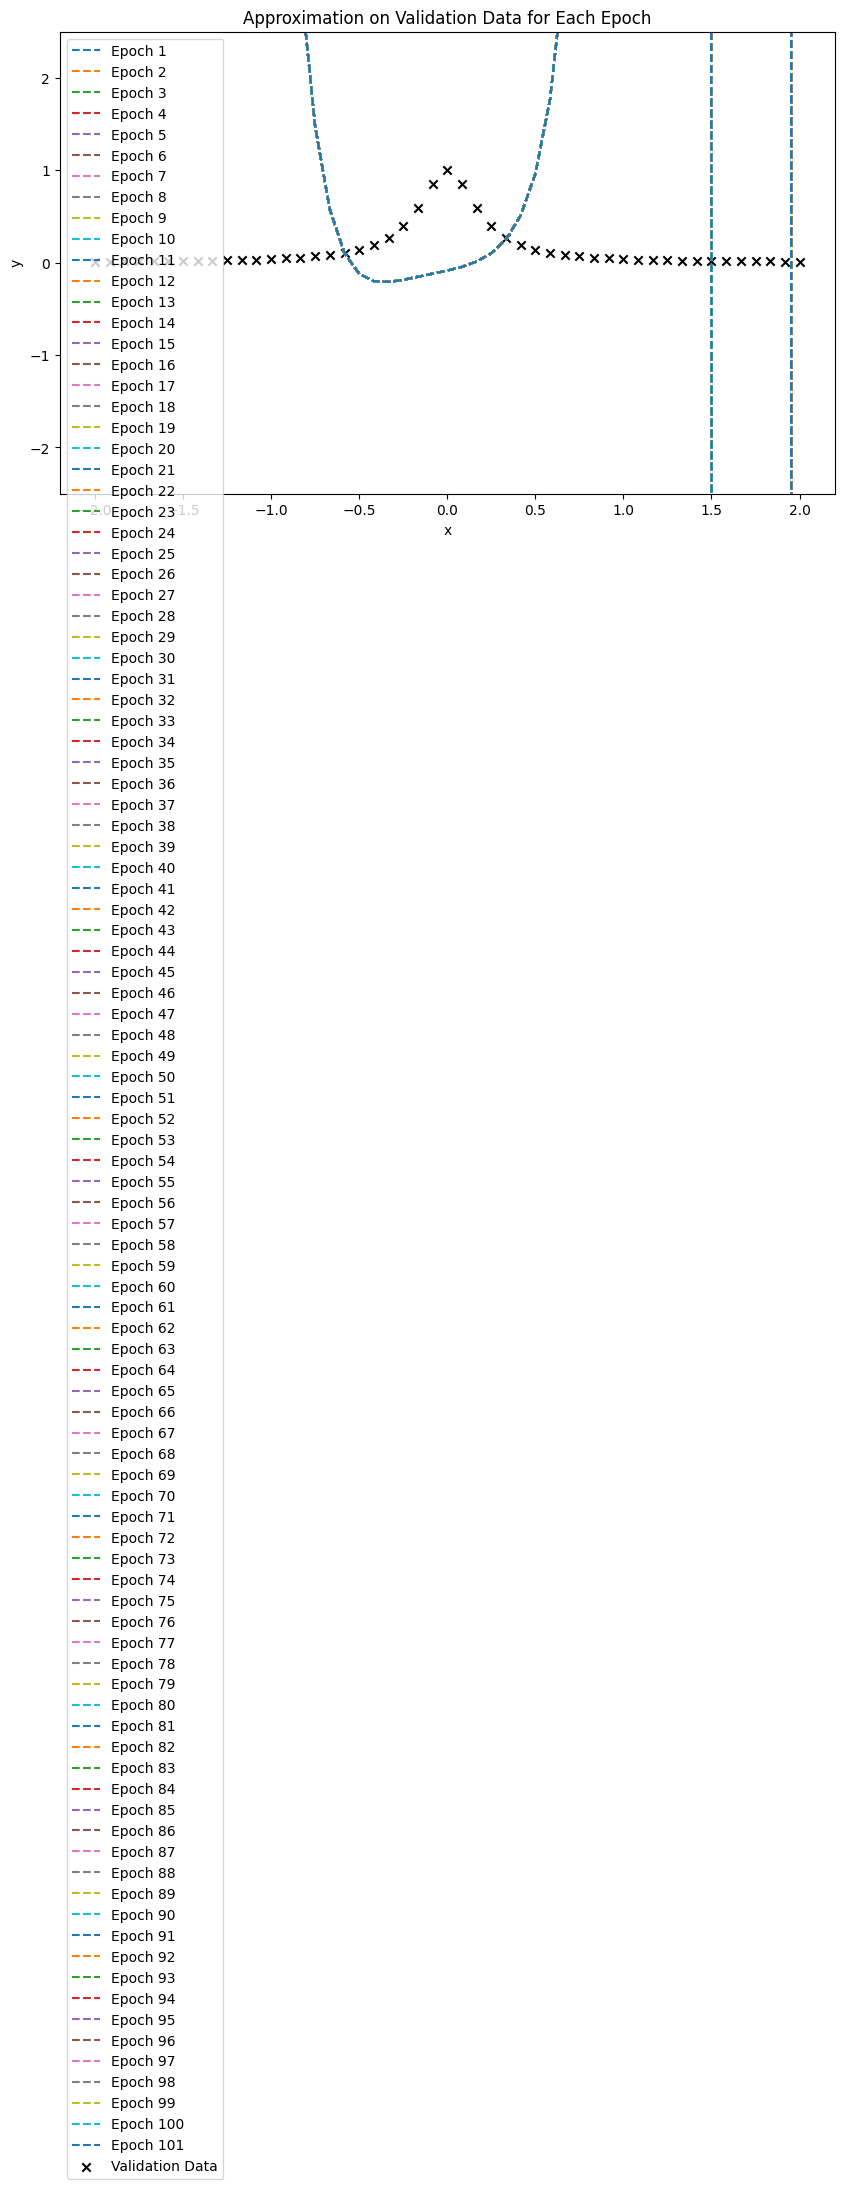

In [25]:
# Создание списка для хранения предсказанных значений на контрольной выборке для каждой эпохи
predicted_values_per_epoch = []

# Построение графиков аппроксимации на контрольной выборке для каждой эпохи
for epoch in range(len(logbook)):
    coefficients = tools.selBest(population, k=1)[0]
    y_pred_control_epoch = np.polyval(coefficients, x_val)
    predicted_values_per_epoch.append(y_pred_control_epoch)

# Построение графиков
plt.figure(figsize=(10, 6))
for epoch, y_pred_epoch in enumerate(predicted_values_per_epoch):
    plt.plot(x_val, y_pred_epoch, label=f'Epoch {epoch + 1}', linestyle='dashed')
plt.scatter(x_val, y_val, label='Validation Data', color='black', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximation on Validation Data for Each Epoch')
plt.legend()

# Установка ограничения по оси y
plt.ylim(-2.5, 2.5)

plt.tight_layout()
plt.show()

gen	evals	min        
1  	100  	6.36441e+09
2  	100  	1.7229e+10 
3  	100  	1.45212e+10
4  	100  	7.20251e+10
5  	100  	1.25208e+11
6  	100  	1.22978e+11
7  	100  	6.12095e+10
8  	100  	9.21204e+11
9  	100  	1.55729e+12
10 	100  	2.16615e+12
11 	100  	2.16615e+12
12 	100  	9.88745e+12
13 	100  	1.92037e+13
14 	100  	5.1409e+13 
15 	100  	1.0921e+14 
16 	100  	1.64346e+14
17 	100  	2.79641e+14
18 	100  	4.12639e+14
19 	100  	1.04514e+15
20 	100  	2.28067e+15
21 	100  	3.68651e+15
22 	100  	6.99317e+15
23 	100  	1.29856e+16
24 	100  	1.94599e+16
25 	100  	3.85993e+16
26 	100  	3.85993e+16
27 	100  	9.73894e+16
28 	100  	1.38445e+17
29 	100  	2.39828e+17
30 	100  	9.39303e+17
31 	100  	1.37641e+18
32 	100  	1.43876e+18
33 	100  	1.05259e+19
34 	100  	1.75777e+19
35 	100  	4.21191e+19
36 	100  	1.03816e+20
37 	100  	2.02216e+20
38 	100  	2.96697e+20
39 	100  	5.05501e+20
40 	100  	1.30321e+21
41 	100  	2.16415e+21
42 	100  	6.76905e+21
43 	100  	1.10585e+22
44 	100  	1.22541e+22
45 	100  	

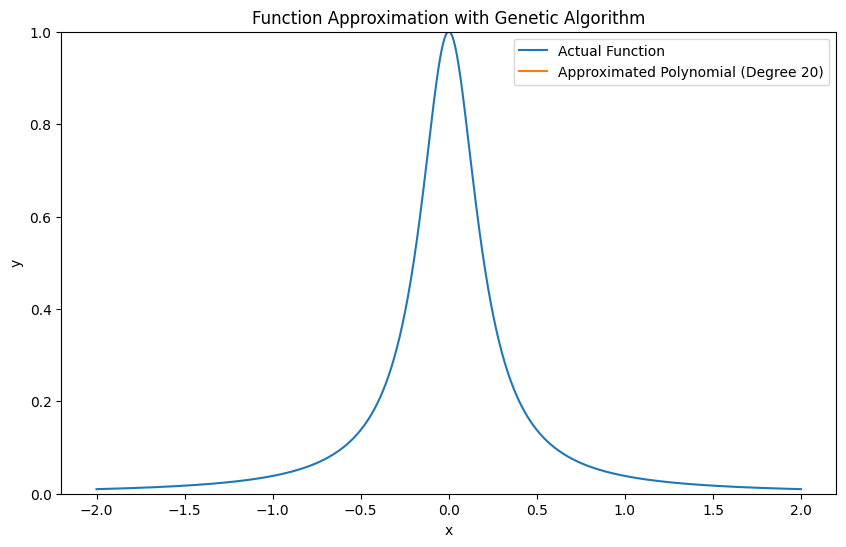

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, creator, tools

# Определение функции, которую мы хотим приблизить
def target_function(x):
    return 1 / (1 + 25 * x**2)

# Определение функции для оценки качества полинома
def evaluate(individual):
    polynomial = np.poly1d(individual)
    x = np.linspace(-2, 2, 1000)
    y_pred = polynomial(x)
    y_actual = target_function(x)
    mse = np.mean((y_pred - y_actual)**2)
    return mse,

# Создание объектов для определения типа задачи (минимизация MSE)
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Настройка параметров генетического алгоритма
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -1, 1)  # Генерация случайных коэффициентов [-1, 1]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=21)  # 21 коэффициент (полином 20-ой степени)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Создание начальной популяции
population = toolbox.population(n=100)
generation = 0
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
logbook = tools.Logbook()
logbook.header = ["gen", "evals", "min"]

# Основной цикл генетического алгоритма
while generation < 100:
    generation += 1
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    record = stats.compile(population)
    logbook.record(gen=generation, evals=len(offspring), **record)
    print(logbook.stream)

# Извлечение лучшего полинома
best_individual = tools.selBest(population, k=1)[0]
best_polynomial = np.poly1d(best_individual)
print("Best Polynomial Coefficients:", best_individual)

# Визуализация результатов
x = np.linspace(-2, 2, 1000)
y_actual = target_function(x)
y_pred = best_polynomial(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_actual, label="Actual Function")
plt.plot(x, y_pred, label="Approximated Polynomial (Degree 20)")
plt.legend()
plt.title("Function Approximation with Genetic Algorithm")
# Установка ограничения по оси y
plt.ylim(0, 1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


gen	evals	min        
1  	1000 	3.16378e+09
2  	1000 	1.04914e+10
3  	1000 	1.18833e+10
4  	1000 	1.80047e+10
5  	1000 	2.54901e+10
6  	1000 	6.50835e+10
7  	1000 	9.55039e+10
8  	1000 	1.00361e+11
9  	1000 	5.61663e+11
10 	1000 	1.90407e+12
11 	1000 	3.89608e+12
12 	1000 	4.25151e+12
13 	1000 	8.31101e+12
14 	1000 	2.70257e+13
15 	1000 	3.75013e+13
16 	1000 	9.59061e+13
17 	1000 	2.53413e+14
18 	1000 	4.10405e+14
19 	1000 	2.16237e+14
20 	1000 	3.79786e+14
21 	1000 	1.98758e+15
22 	1000 	2.65758e+15
23 	1000 	7.69875e+15
24 	1000 	8.91499e+15
25 	1000 	4.10423e+16
26 	1000 	6.55994e+16
27 	1000 	8.01455e+16
28 	1000 	1.85659e+17
29 	1000 	2.70965e+17
30 	1000 	9.29517e+17
31 	1000 	1.73269e+18
32 	1000 	3.79046e+18
33 	1000 	3.7266e+18 
34 	1000 	5.47741e+18
35 	1000 	1.75775e+19
36 	1000 	3.88844e+19
37 	1000 	7.50067e+19
38 	1000 	1.37334e+20
39 	1000 	6.94834e+19
40 	1000 	2.4611e+20 
41 	1000 	4.87948e+20
42 	1000 	2.16712e+21
43 	1000 	3.9643e+21 
44 	1000 	5.76808e+21
45 	1000 	

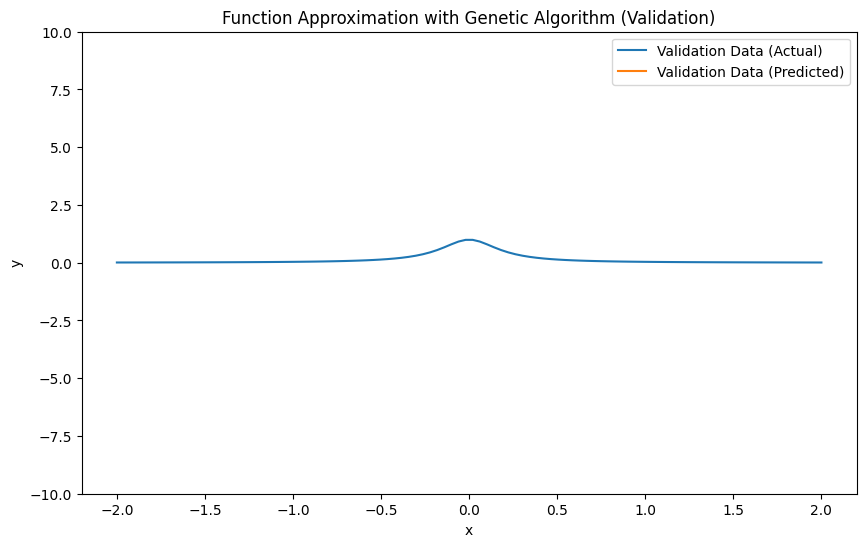

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, creator, tools

# Определение функции, которую мы хотим приблизить
def target_function(x):
    return 1 / (1 + 25 * x**2)

# Определение функции для оценки качества полинома
def evaluate(individual, x, y_actual):
    polynomial = np.poly1d(individual)
    y_pred = polynomial(x)
    mse = np.mean((y_pred - y_actual)**2)
    return mse,

# Создание объектов для определения типа задачи (минимизация MSE)
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Настройка параметров генетического алгоритма
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -1, 1)  # Генерация случайных коэффициентов [-1, 1]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=21)  # 21 коэффициент (полином 20-ой степени)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Создание обучающей выборки
l_train = 100  # Размер обучающей выборки
x_train = np.linspace(-2, 2, l_train)
y_train = target_function(x_train)

# Создание контрольной выборки
l_val = 100  # Размер контрольной выборки
x_val = np.linspace(-2, 2, l_val)
y_val = target_function(x_val)

# Создание начальной популяции
population = toolbox.population(n=1000)
generation = 0
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
logbook = tools.Logbook()
logbook.header = ["gen", "evals", "min"]

# Основной цикл генетического алгоритма
while generation < 500:
    generation += 1
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.2)
    
    # Evaluate each individual in the offspring
    fits = []
    for ind in offspring:
        fit = toolbox.evaluate(ind, x_train, y_train)
        fits.append(fit)
        ind.fitness.values = fit
    
    population = toolbox.select(offspring, k=len(population))
    record = stats.compile(population)
    logbook.record(gen=generation, evals=len(offspring), **record)
    print(logbook.stream)

# Извлечение лучшего полинома
best_individual = tools.selBest(population, k=1)[0]
best_polynomial = np.poly1d(best_individual)
print("Best Polynomial Coefficients:", best_individual)

# Оценка производительности на контрольной выборке
y_pred_val = best_polynomial(x_val)
mse_val = np.mean((y_pred_val - y_val)**2)
print("MSE on Validation Data:", mse_val)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(x_val, y_val, label="Validation Data (Actual)")
plt.plot(x_val, y_pred_val, label="Validation Data (Predicted)")
plt.legend()
plt.title("Function Approximation with Genetic Algorithm (Validation)")
# Установка ограничения по оси y
plt.ylim(-10, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


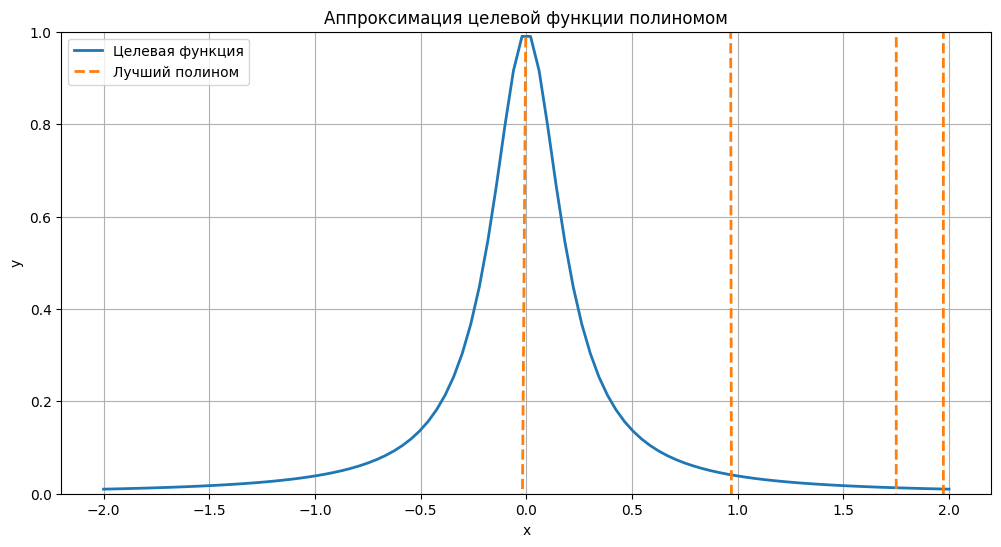

Лучший полином:
          20           19          18          17          16
-0.03344 x  - 0.09825 x  + 0.0884 x  + 0.3267 x  + 0.2907 x 
           15           14          13          12          11
 + 0.5408 x  - 0.07721 x  - 0.3698 x  - 0.7339 x  - 0.5933 x 
          10         9         8         7      6         5          4
 - 1.035 x  - 8.306 x - 4.997 x - 3.064 x - 19 x - 24.51 x - 0.8858 x
          3         2
 - 9.808 x - 2.643 x + 64.4 x + 1.158


In [1]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Определение функции для оценки приспособленности
def fitness_function(individual):
    # individual содержит коэффициенты полинома
    polynomial = np.poly1d(individual)
    x_values = np.linspace(-2, 2, 100)  # Генерируем значения x
    y_values = 1 / (1 + 25 * x_values**2)  # Значения целевой функции
    predicted_values = polynomial(x_values)  # Значения полинома
    mse = np.mean((y_values - predicted_values)**2)  # Среднеквадратичная ошибка
    return mse,

# Создание типа FitnessMin (минимизация ошибки)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# Создание типа Individual (хромосомы)
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("individual", tools.initRepeat, creator.Individual, random.random, n=21)  # 21 коэффициент
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Инициализация популяции
population = toolbox.population(n=1000)
# Максимальное число эпох
max_generations = 100

# Список для хранения значений лучшей приспособленности по эпохам
best_fitness_values = []

# Основной цикл оптимизации
for generation in range(max_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.3)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    best_ind = tools.selBest(population, k=1)[0]
    best_fitness_values.append(best_ind.fitness.values[0])

# Получение лучшей хромосомы и полинома
best_individual = tools.selBest(population, k=1)[0]
best_polynomial = np.poly1d(best_individual)

# Визуализация процесса обучения
plt.figure(figsize=(12, 6))

# График целевой функции
x_values = np.linspace(-2, 2, 100)
y_values = 1 / (1 + 25 * x_values**2)
plt.plot(x_values, y_values, label="Целевая функция", linewidth=2)

# График лучшего полинома
predicted_values = best_polynomial(x_values)
plt.plot(x_values, predicted_values, label="Лучший полином", linestyle="--", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Аппроксимация целевой функции полиномом")
# Установка ограничения по оси y
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Вывод лучшего полинома
print("Лучший полином:")
print(best_polynomial)


In [2]:
# Вычисление среднеквадратичной ошибки (MSE)
mse = fitness_function(best_individual)[0]
print("Среднеквадратичная ошибка (MSE):", mse)

Среднеквадратичная ошибка (MSE): 105056.00944532902


In [ ]:
import random
population_size=10
chromosomes_length=4    #dont forget to change the number of variables i.r chromosomes length given the equation
tournament_size=3
population=[]
crossover_rate=.8
mutation_rate=0.5
for i in range(population_size):
    population.append([random.randint(0,30) for i in range(chromosomes_length)])

#print("Initial Population:",population)
def evaluation(population):
    fitness=[]
    f_objective=[]
    for individual in population:
        #f_objective.append((individual[0]**3)+(individual[1]**3)+(3*individual[0]**2*individual[1])+(3*individual[0]*individual[1]**2)-27) #for cubic sustem
        #f_objective.append((individual[0]**2)-(2*individual[0]*individual[1])+(individual[1]**2)-4) #for qaudratic system
        f_objective.append(abs((individual[0]+2*individual[1]+3*individual[2]+4*individual[3])-30)) #for linear system
    #print(f_objective)

    for health in f_objective:
        fitness.append(1.0/(1+health))
    #print("Fitenss: ",fitness)
    
    return fitness

def check(fitness,population):
    for health in fitness:
        if health==1:
            print("Solution Found:")
            print(population[fitness.index(1)])
            return 1
        else: 
            return 0
            
def tournament(probablity,population):
    gen=[]
    parents=[]
    for j in range(population_size):
        team=[]
        for i in range(tournament_size):
            x=random.randint(0,population_size-1)
            team.append(probablity[x])
        gen.append(max(team))
        del team
    for parent in gen:
        parents.append(population[probablity.index(parent)])
    return parents

def selection(fitness):
    probablity=[]
    total_fitness=sum(fitness)
    for fit in fitness:
        probablity.append(fit/total_fitness)
    #print("Probablity:",probablity)
    parents=tournament(probablity,population)  
    return parents
    
def mutation(parents):
    for i in range(int(population_size*mutation_rate)):
        mutant=random.randint(0,len(parents)-1)
        #print("Mutant ",mutant)
        mutant_gene=random.randint(0,chromosomes_length-1)
        parents[mutant][mutant_gene]=random.randint(0,30)
        return parents
        
def crossover(parents):
    i=0
    cross_number=int(crossover_rate*population_size)    
    for i in range(cross_number):
        cross_location=random.randint(0,chromosomes_length-1)
        father=random.randint(0,len(parents)-1)
        mother=random.randint(0,len(parents)-1)
        #print("father %d,mother %d location=%d"%(father,mother,cross_location))
        if mother != father:
            geneF=parents[father][cross_location]
            geneM=parents[mother][cross_location]
            parents[father][cross_location]=geneM
            parents[mother][cross_location]=geneF    
    return parents
   
for i in range(5000):  
    fitness=evaluation(population)
    parents=selection(fitness)
    if check(fitness,population)==1:
        break;
    #print("After Selection, parents: ",parents)
    parents=crossover(parents)
    #print("After cross",parents)
    parents=mutation(parents)
    #print("After mutation: ",parents)
    population[:]=parents[:]
    #print(population)
    #print("-------------------------------------------")   
print("after %d generation :"%(i))

In [2]:
import numpy as np
import random
from deap import base, creator, tools, algorithms

# Определение функции, которую мы хотим аппроксимировать
def target_function(x):
    return 1 / (1 + 25 * x**2)

# Создаем тип FitnessMin для оптимизации
creator.create("FitnessMin", base.Fitness, weights=(1.0,))

# Создаем класс Individual с полиномом степени 20 в качестве гена
creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)

# Генерация случайного полинома
def generate_individual():
    return np.random.uniform(-1, 1, 21)  # 21 коэффициент полинома степени 20

# Определение функции вычисления fitness
def evaluate_individual(individual):
    x = np.linspace(-2, 2, 1000)
    y_target = np.array([target_function(xi) for xi in x])
    y_approx = np.polyval(individual, x)
    error = np.mean((y_target - y_approx)**2)
    return error,

toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, generate_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

if __name__ == "__main__":
    # Создание начальной популяции
    population = toolbox.population(n=100)
    
    # Запуск генетического алгоритма
    algorithms.eaMuPlusLambda(population, toolbox, mu=50, lambda_=100, cxpb=0.7, mutpb=0.2, ngen=100, stats=None, halloffame=None, verbose=True)
    
    # Вывод наилучшего полинома
    best_individual = tools.selBest(population, k=1)[0]
    print("Best Individual:", best_individual)


C:\Users\AlexB\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\AlexB\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	100   
1  	90    
2  	90    
3  	89    
4  	93    
5  	89    
6  	88    
7  	89    
8  	90    
9  	93    
10 	90    
11 	86    
12 	91    
13 	92    
14 	90    
15 	90    
16 	94    
17 	92    
18 	92    
19 	90    
20 	94    
21 	88    
22 	88    
23 	91    
24 	86    
25 	89    
26 	90    
27 	86    
28 	95    
29 	90    
30 	91    
31 	92    
32 	89    
33 	86    
34 	87    
35 	95    
36 	91    
37 	86    
38 	90    
39 	87    
40 	92    
41 	87    
42 	91    
43 	87    
44 	87    
45 	86    
46 	90    
47 	85    
48 	94    
49 	94    
50 	90    
51 	88    
52 	88    
53 	91    
54 	78    
55 	95    
56 	90    
57 	92    
58 	84    
59 	89    
60 	89    
61 	90    
62 	87    
63 	85    
64 	92    
65 	87    
66 	86    
67 	93    
68 	85    
69 	91    
70 	90    
71 	89    
72 	93    
73 	86    
74 	90    
75 	88    
76 	92    
77 	90    
78 	91    
79 	92    
80 	83    
81 	91    
82 	89    
83 	86    
84 	87    
85 	88    
86 	94    
87 	87    
88 	91    
89 	89    